# Lab 7.01 - Time series analysis

In [4]:
# Package imports for data science and time series analysis in particular
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe
import scipy.stats as stats                         # Statistical tests

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced dataviz

from sklearn.linear_model import LinearRegression   # Linear regression model

# Time series analysis
from datetime import datetime
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

### Exercise 1 - House sales

The file House Sales.csv contains monthly data on the number of new one-family
houses sold in the United States (in thousands) from January 1991 through December 2011.
Housing sales were steadily trending upward until about the beginning of 2006, then the
bottom fell out of the housing market, and sales eventually started trending upward again.   

- First Create a time series chart of the data.
- Add predictions for Simple Moving Average with span of 3, 6 and 12 months to the dataframe.
- Add predictions for Simple Exponential Smooting to the dataframe.
- Add predictions for Double Exponential Smoothing to the dataframe.
- Calculate the MAE to find the best model

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Monthly%20House%20Sales.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
data.head()

C:\Users\Jamie\AppData\Local\Temp\ipykernel_10628\2792024889.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Monthly%20House%20Sales.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])


,Houses Sold
Month,
jan/91,401
feb/91,482
mrt/91,507
apr/91,508
mei/91,517


First Create a time series chart of the data.

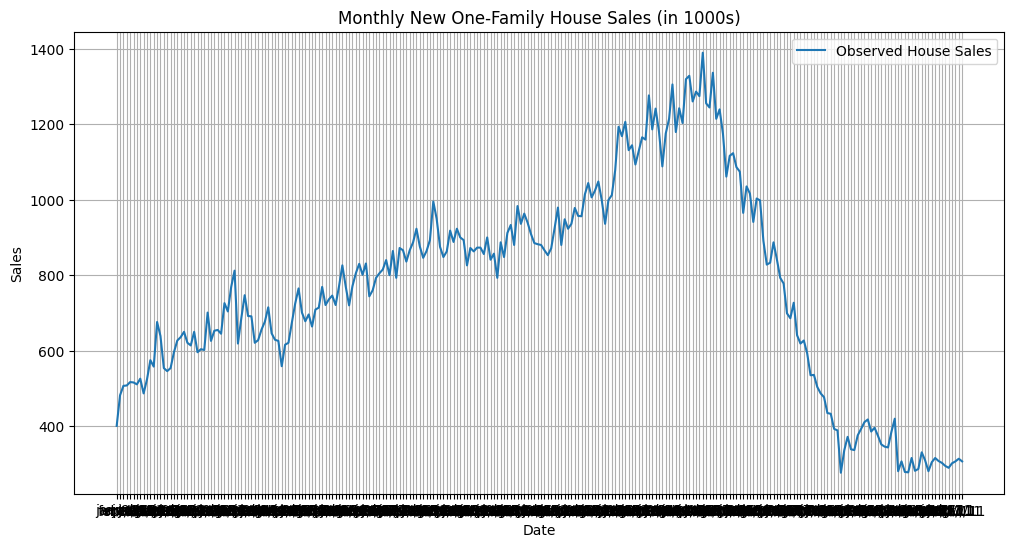

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(data, label='Observed House Sales')
plt.title("Monthly New One-Family House Sales (in 1000s)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()


Add predictions for Simple Moving Average with span of 3, 6 and 12 months to the dataframe.

In [10]:
# We voegen voorspellingen toe met een voortschrijdend gemiddelde van 3, 6 en 12 maanden.
data['SMA3'] = data['Houses Sold'].rolling(window=3).mean()
data['SMA6'] = data['Houses Sold'].rolling(window=6).mean()
data['SMA12'] = data['Houses Sold'].rolling(window=12).mean()


Add predictions for Simple Exponential Smooting to the dataframe.

In [11]:
# SES houdt rekening met het belang van recente observaties (gewicht afnemend in de tijd).
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model_ses = SimpleExpSmoothing(data['Houses Sold']).fit()
data['SES'] = model_ses.fittedvalues

c:\Users\Jamie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\Jamie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


Add predictions for Double Exponential Smoothing to the dataframe.

In [12]:
# DES houdt zowel rekening met niveau als trend in de tijdreeks.
model_des = Holt(data['Houses Sold']).fit()
data['DES'] = model_des.fittedvalues

c:\Users\Jamie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\Jamie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


Calculate the MAE to find the best model. First drop the rows with NaN.

In [13]:
columns = ['SMA3', 'SMA6', 'SMA12', 'SES', 'DES']
data_clean = data.dropna(subset=columns)

In [14]:
mae_results = {}
for col in columns:
    mae = mean_absolute_error(data_clean['Houses Sold'], data_clean[col])
    mae_results[col] = mae
#print(mae_results.items())
# Toon de resultaten
for model, score in mae_results.items():
    print(f"MAE {model}: {score:.2f}")


MAE SMA3: 26.43
MAE SMA6: 36.81
MAE SMA12: 54.42
MAE SES: 38.42
MAE DES: 38.62


## Source
Business Analytics Data Analysis & Decision Making 


---

##  1. Simple Moving Average (SMA)

###  Wat is het?
Het **voortschrijdend gemiddelde** (Simple Moving Average) is een methode waarbij we steeds het gemiddelde nemen van een bepaald aantal vorige waarnemingen.

###  Waarom gebruiken?
- **Simpel** en **snel**
- Goed om **ruis glad te strijken**
- Nuttig voor **korte termijn trends**

###  Formule
Als `Yₜ` de waarde is op tijdstip `t`, dan is de SMA met een venster van 3 maanden:


###  Beperkingen
- Houdt **geen rekening met trend of seizoen**
- Elke waarde krijgt evenveel gewicht, dus **recente informatie telt niet zwaarder**

---

##  2. Simple Exponential Smoothing (SES)

###  Wat is het?
SES maakt gebruik van een **gewogen gemiddelde**, waarbij **recente waarden meer gewicht** krijgen dan oudere waarden. Het gewicht neemt **exponentieel af**.

###  Waarom gebruiken?
- Goed voor data **zonder duidelijke trend of seizoen**
- Legt meer nadruk op **recente data**
- Beter dan SMA als je recente veranderingen belangrijk vindt

###  Beperkingen
- Kan **geen trend volgen**
- Minder geschikt bij seizoenspatronen

---

##  3. Double Exponential Smoothing (DES) / Holt’s method

###  Wat is het?
DES (ook Holt’s method genoemd) breidt SES uit door **ook een trendcomponent** toe te voegen. Het model leert dus zowel het **niveau** als de **trend** van de tijdreeks.

###  Waarom gebruiken?
- Geschikt voor data met **duidelijke trend**
- Voorspellingen volgen beter de richting van de data

###  Formule (intuïtief)
DES heeft twee vergelijkingen:
- Eén voor het niveau (actuele waarde)
- Eén voor de trend

###  In code:
```python
model = Holt(data).fit()
forecast = model.fittedvalues
